# EDA
Se realizara el analisis exploratorio de los datos


In [68]:
# Librerias a usar
import pandas as pd 
import numpy as np
import matplotlib
import seaborn 

In [69]:
# Carga de los dataframes
df_Hechos = pd.read_parquet('Data\Hechos_Homicidios_ETL.parquert')
df_Victimas = pd.read_parquet('Data\Victimas_Homicidios_ETL.parquert')

In [70]:
# Vista previa del datframe
df_Hechos.head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1.0,1/1/2016,2016.0,1.0,1.0,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8.0,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1.0,1/2/2016,2016.0,1.0,2.0,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9.0,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1.0,1/3/2016,2016.0,1.0,3.0,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,None,ENTRE RIOS AV. 2034,1.0,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1.0,1/10/2016,2016.0,1.0,10.0,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8.0,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1.0,1/21/2016,2016.0,1.0,21.0,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1.0,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [100]:
df_Hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     695 non-null    object  
 1   N_VICTIMAS             695 non-null    float64 
 2   FECHA                  695 non-null    object  
 3   AAAA                   695 non-null    category
 4   MM                     695 non-null    category
 5   DD                     695 non-null    category
 6   HORA                   695 non-null    object  
 7   HH                     694 non-null    float64 
 8   LUGAR_DEL_HECHO        695 non-null    object  
 9   TIPO_DE_CALLE          695 non-null    object  
 10  Calle                  695 non-null    object  
 11  Altura                 129 non-null    float64 
 12  Cruce                  525 non-null    object  
 13  Dirección Normalizada  688 non-null    object  
 14  COMUNA                 695 non-null    cat

In [72]:
# Cambio en el formato de los datos debido a que son numeros pero de caracter cualitativo y no cuantitativo 
df_Hechos["AAAA"]= df_Hechos["AAAA"].astype("category")

df_Hechos["MM"]= df_Hechos["MM"].astype("category")

df_Hechos["DD"]= df_Hechos["DD"].astype("category")

df_Hechos["COMUNA"] = df_Hechos["COMUNA"].astype('category')


In [73]:
conteo_valores = df_Hechos['N_VICTIMAS'].value_counts()

# Crear un nuevo DataFrame con los resultados
df_conteo = pd.DataFrame({
    'Valor': conteo_valores.index,
    'Cantidad': conteo_valores.values
})
print(df_conteo)

   Valor  Cantidad
0    1.0       675
1    2.0        19
2    3.0         1


In [74]:
conteo_valores = df_Hechos['AAAA'].value_counts()

# Crear un nuevo DataFrame con los resultados
df_conteo = pd.DataFrame({
    'Valor': conteo_valores.index,
    'Cantidad': conteo_valores.values
})
print(df_conteo)

    Valor  Cantidad
0  2016.0       143
1  2018.0       143
2  2017.0       131
3  2019.0       103
4  2021.0        97
5  2020.0        78


In [75]:
conteo_valores = df_Hechos['TIPO_DE_CALLE'].value_counts()

# Crear un nuevo DataFrame con los resultados
df_conteo = pd.DataFrame({
    'Valor': conteo_valores.index,
    'Cantidad': conteo_valores.values
})
print(df_conteo)

       Valor  Cantidad
0    AVENIDA       429
1      CALLE       135
2  AUTOPISTA        66
3   GRAL PAZ        65


In [76]:
conteo_valores = df_Hechos['COMUNA'].value_counts()

# Crear un nuevo DataFrame con los resultados
df_conteo = pd.DataFrame({
    'Valor': conteo_valores.index,
    'Cantidad': conteo_valores.values
})
print(df_conteo)

   Valor  Cantidad
0    1.0        90
1    4.0        76
2    9.0        73
3    8.0        65
4    7.0        60
5    3.0        45
6   15.0        44
7   13.0        40
8   12.0        37
9   14.0        35
10  11.0        32
11  10.0        29
12   2.0        25
13   5.0        22
14   6.0        21
15   0.0         1


In [77]:
conteo_valores = df_Hechos['PARTICIPANTES'].value_counts()

# Crear un nuevo DataFrame con los resultados
df_conteo = pd.DataFrame({
    'Valor': conteo_valores.index,
    'Cantidad': conteo_valores.values
})
print(df_conteo)


                  Valor  Cantidad
0      PEATON-PASAJEROS       105
1             MOTO-AUTO        83
2           MOTO-CARGAS        78
3           PEATON-AUTO        77
4        MOTO-PASAJEROS        46
5      MOTO-OBJETO FIJO        40
6         PEATON-CARGAS        38
7             AUTO-AUTO        31
8           PEATON-MOTO        30
9             MOTO-MOTO        25
10     AUTO-OBJETO FIJO        22
11             MULTIPLE        17
12          AUTO-CARGAS        14
13     BICICLETA-CARGAS        10
14       AUTO-PASAJEROS         9
15              MOTO-SD         9
16  BICICLETA-PASAJEROS         8
17       BICICLETA-AUTO         8
18                SD-SD         5
19     PEATON-BICICLETA         5
20              AUTO-SD         4
21        CARGAS-CARGAS         4
22            PEATON-SD         3
23  PASAJEROS-PASAJEROS         3
24            MOTO-OTRO         2
25       MOTO-BICICLETA         2
26              SD-AUTO         2
27           MOTO-MOVIL         2
28   CARGAS-OB

In [78]:
conteo_valores = df_Hechos['VICTIMA'].value_counts()

# Crear un nuevo DataFrame con los resultados
df_conteo = pd.DataFrame({
    'Valor': conteo_valores.index,
    'Cantidad': conteo_valores.values
})
print(df_conteo)

         Valor  Cantidad
0         MOTO       295
1       PEATON       263
2         AUTO        83
3    BICICLETA        29
4           SD         9
5       CARGAS         7
6    PASAJEROS         5
7        MOVIL         2
8  OBJETO FIJO         1
9  PEATON_MOTO         1


In [79]:
conteo_valores = df_Hechos['ACUSADO'].value_counts()

# Crear un nuevo DataFrame con los resultados
df_conteo = pd.DataFrame({
    'Valor': conteo_valores.index,
    'Cantidad': conteo_valores.values
})
print(df_conteo)

         Valor  Cantidad
0         AUTO       204
1    PASAJEROS       173
2       CARGAS       146
3  OBJETO FIJO        62
4         MOTO        57
5           SD        22
6     MULTIPLE        17
7    BICICLETA         7
8         OTRO         6
9         TREN         1


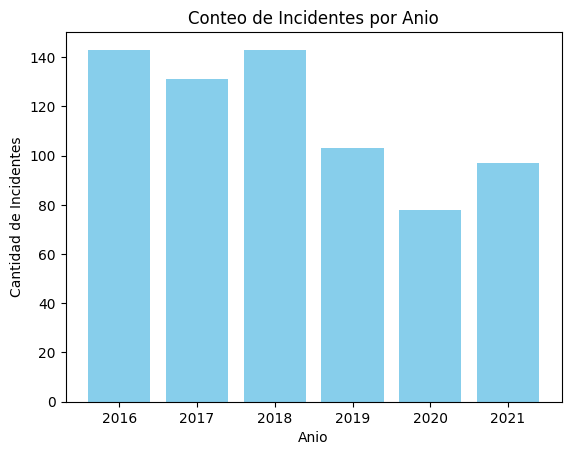

In [80]:
# Cantidad de incidentes por anio

import matplotlib.pyplot as plt

conteo_por_anio = df_Hechos['AAAA'].value_counts().sort_index()

plt.bar(conteo_por_anio.index, conteo_por_anio.values, color='skyblue')
plt.xlabel('Anio')
plt.ylabel('Cantidad de Incidentes')
plt.title('Conteo de Incidentes por Anio')
# Agregar etiquetas con los valores numéricos para cada barra
plt.show()


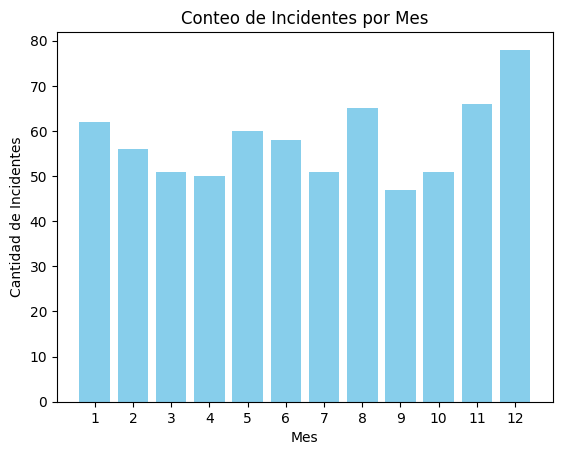

In [86]:
# Cantidad de incidentes por Mes

import matplotlib.pyplot as plt

conteo_por_mes = df_Hechos['MM'].value_counts().sort_index()

plt.bar(conteo_por_mes.index, conteo_por_mes.values, color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Incidentes')
plt.title('Conteo de Incidentes por Mes')
plt.xticks(conteo_por_mes.index)  # Establecer las etiquetas del eje x
# Agregar etiquetas con los valores numéricos para cada barra
plt.show()


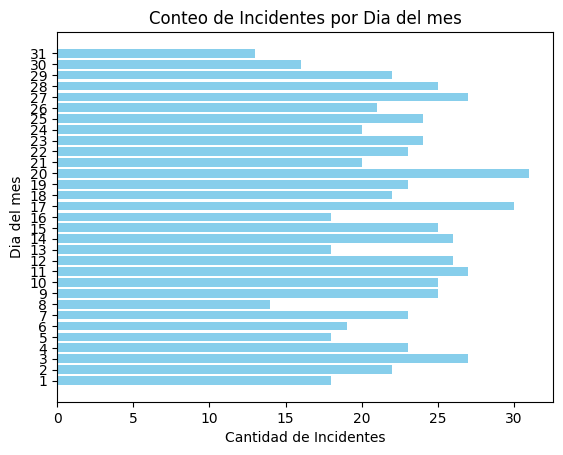

In [88]:
# Cantidad de incidentes por dia del mes

import matplotlib.pyplot as plt

conteo_por_dia = df_Hechos['DD'].value_counts().sort_index()

plt.barh(conteo_por_dia.index, conteo_por_dia.values, color='skyblue')
plt.ylabel('Dia del mes')
plt.xlabel('Cantidad de Incidentes')
plt.title('Conteo de Incidentes por Dia del mes')
plt.yticks(conteo_por_dia.index)  # Establecer las etiquetas del eje x
# Agregar etiquetas con los valores numéricos para cada barra
plt.show()

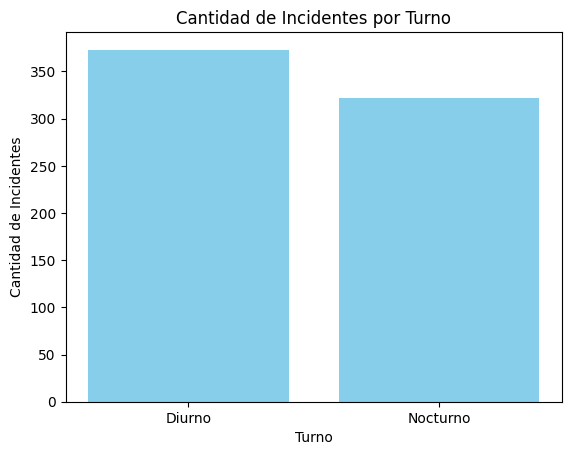

In [103]:

# Suponiendo que 'HH' es la columna que representa la hora en formato de 24 horas
df_Hechos['Turno'] = df_Hechos['HH'].apply(lambda hora: 'Diurno' if 6 <= hora < 18 else 'Nocturno')
# Cantidad de incidentes por comuna

conteo_por_turno = df_Hechos['Turno'].value_counts().sort_index()

plt.bar(conteo_por_turno.index, conteo_por_turno.values, color='skyblue')
plt.xlabel('Turno')
plt.ylabel('Cantidad de Incidentes')
plt.title('Cantidad de Incidentes por Turno')
plt.xticks(conteo_por_turno.index)  # Establecer las etiquetas del eje x
plt.show()


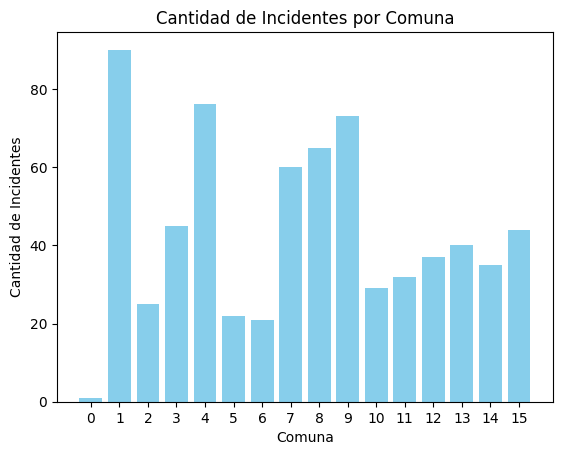

In [82]:
# Cantidad de incidentes por comuna

conteo_por_comuna = df_Hechos['COMUNA'].value_counts().sort_index()

plt.bar(conteo_por_comuna.index, conteo_por_comuna.values, color='skyblue')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Incidentes')
plt.title('Cantidad de Incidentes por Comuna')
plt.xticks(conteo_por_comuna.index)  # Establecer las etiquetas del eje x
plt.show()


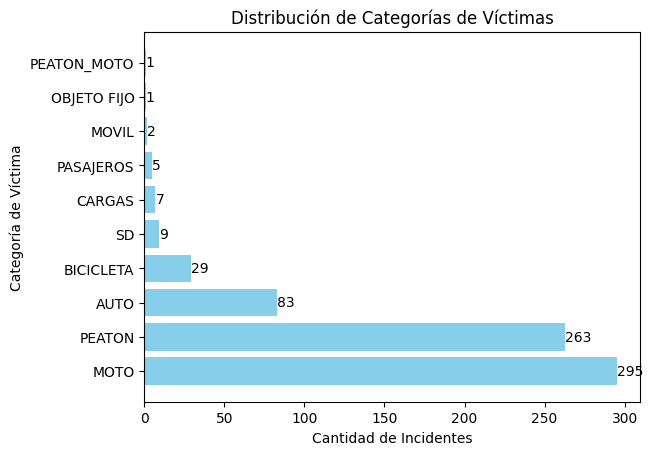

In [83]:
# Victimas dependiendo el transporte que usaban

conteo_victimas = df_Hechos['VICTIMA'].value_counts()

plt.barh(conteo_victimas.index, conteo_victimas.values, color='skyblue')
plt.xlabel('Cantidad de Incidentes')
plt.ylabel('Categoría de Víctima')
plt.title('Distribución de Categorías de Víctimas')

# Agregar etiquetas con los valores numéricos para cada barra
for index, value in enumerate(conteo_victimas.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.show()



Como podemos observar hay una clara tendencia que dice que la mayoria de las victimas se encuentran en las categorias de moto y peaton

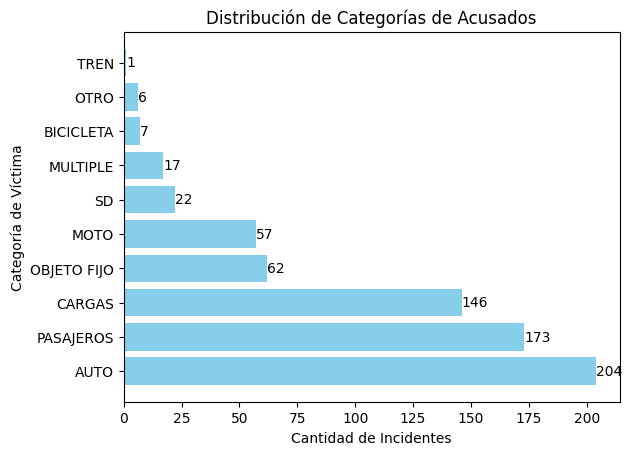

In [84]:
# Acusado dependiendo el transporte que usaban

conteo_acusado = df_Hechos['ACUSADO'].value_counts()

plt.barh(conteo_acusado.index, conteo_acusado.values, color='skyblue')
plt.xlabel('Cantidad de Incidentes')
plt.ylabel('Categoría de Víctima')
plt.title('Distribución de Categorías de Acusados')

# Agregar etiquetas con los valores numéricos para cada barra
for index, value in enumerate(conteo_acusado.values):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.show()


Podemos observar que los vehiculos mas acusados son de las categorias auto, pasajeros y carga por lo que podemos concluir que los vehiculos grandes son los que mas intervienen

In [89]:
df_Victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016.0,1.0,1.0,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016.0,1.0,2.0,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016.0,1.0,3.0,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016.0,1.0,10.0,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016.0,1.0,21.0,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,12/12/2021,2021.0,12.0,12.0,PEATON,PEATON,FEMENINO,50,12/12/2021
713,2021-0093,12/13/2021,2021.0,12.0,13.0,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,12/18/2021
714,2021-0094,12/20/2021,2021.0,12.0,20.0,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,12/20/2021
715,2021-0095,12/30/2021,2021.0,12.0,30.0,CONDUCTOR,MOTO,MASCULINO,27,1/2/2022


In [104]:
df_Victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_hecho             717 non-null    object 
 1   FECHA                717 non-null    object 
 2   AAAA                 717 non-null    float64
 3   MM                   717 non-null    float64
 4   DD                   717 non-null    float64
 5   ROL                  717 non-null    object 
 6   VICTIMA              717 non-null    object 
 7   SEXO                 717 non-null    object 
 8   EDAD                 717 non-null    object 
 9   FECHA_FALLECIMIENTO  717 non-null    object 
dtypes: float64(3), object(7)
memory usage: 56.1+ KB


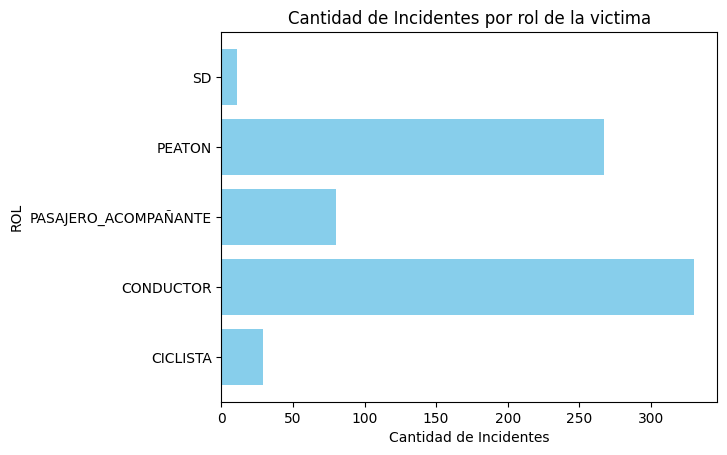

In [122]:
# Cantidad de incidentes por rol de la victima

conteo_por_rol = df_Victimas['ROL'].value_counts().sort_index()

plt.barh(conteo_por_rol.index, conteo_por_rol.values, color='skyblue')
plt.ylabel('ROL')
plt.xlabel('Cantidad de Incidentes')
plt.title('Cantidad de Incidentes por rol de la victima')
plt.show()

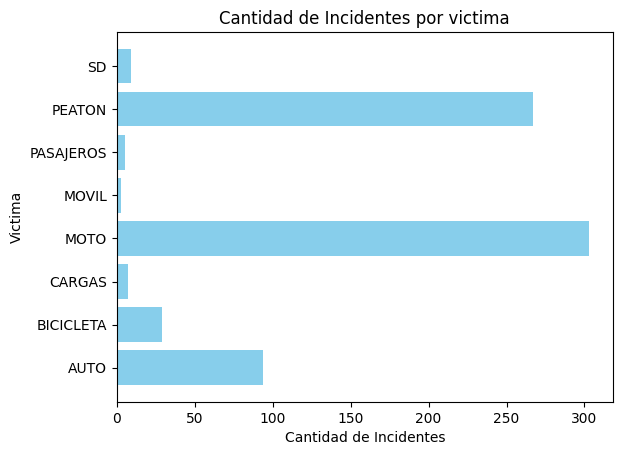

In [123]:
# Cantidad de incidentes por Victima 

conteo_por_Victima = df_Victimas['VICTIMA'].value_counts().sort_index()

plt.barh(conteo_por_Victima.index, conteo_por_Victima.values, color='skyblue')
plt.ylabel('Victima')
plt.xlabel('Cantidad de Incidentes')
plt.title('Cantidad de Incidentes por victima')
plt.show()

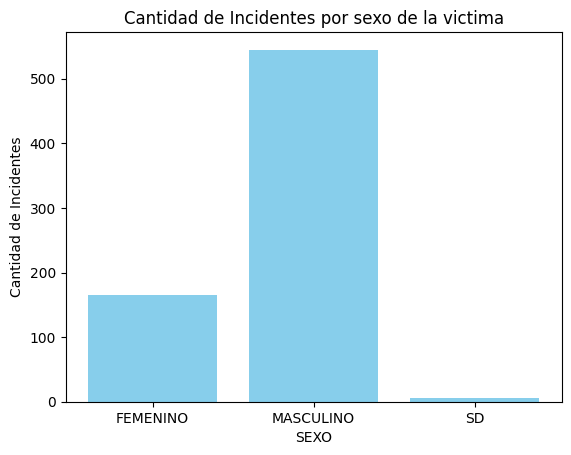

In [115]:
# Cantidad de incidentes por sexo de la victima

conteo_por_SEXO = df_Victimas['SEXO'].value_counts().sort_index()

plt.bar(conteo_por_SEXO.index, conteo_por_SEXO.values, color='skyblue')
plt.xlabel('SEXO')
plt.ylabel('Cantidad de Incidentes')
plt.title('Cantidad de Incidentes por sexo de la victima')
plt.xticks(conteo_por_SEXO.index)  # Establecer las etiquetas del eje x
plt.show()

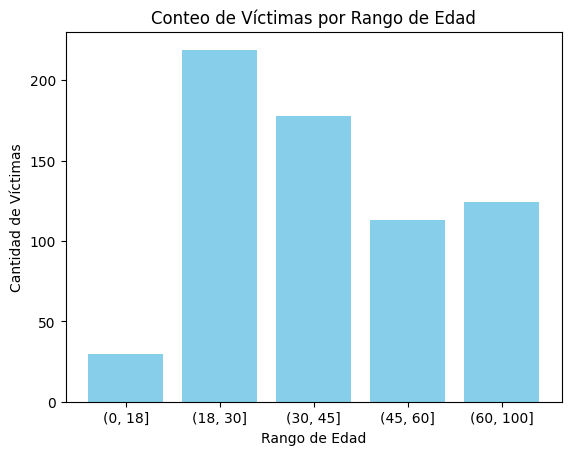

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'EDAD' es la columna que representa la edad de la víctima
# Convertir la columna 'EDAD' a numérica y manejar valores no válidos
df_Victimas['EDAD'] = pd.to_numeric(df_Victimas['EDAD'], errors='coerce')

# Definir los límites de los intervalos para los rangos de edad
bins = [0, 18, 30, 45, 60, 100]

# Crear una nueva columna 'Rango_Edad' utilizando pd.cut
df_Victimas['Rango_Edad'] = pd.cut(df_Victimas['EDAD'], bins=bins)

# Realizar el conteo de víctimas en cada rango de edad
conteo_por_edad = df_Victimas['Rango_Edad'].value_counts().sort_index()

# Crear el gráfico de barras
plt.bar(conteo_por_edad.index.astype(str), conteo_por_edad.values, color='skyblue')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Víctimas')
plt.title('Conteo de Víctimas por Rango de Edad')
plt.show()


